In [13]:
import os
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pyspark.pandas as ps
import numpy as np

%matplotlib inline

In [14]:
def load_table(filename):
    tpch_df = spark.read.format('csv') \
    .option('header', 'false') \
    .option('delimiter', '|') \
    .load(filename, inferSchema='true')    
    return tpch_df

def getFieldList(tablename):
    dss_ddl_file = tpch_home + "/dss.ddl"
    table=tablename
    with open(dss_ddl_file, 'r') as file:
        data = file.read()
    str_pos= data.index(table)
    end_pos= data.index(";",str_pos)
    data=data[str_pos+len(table)+3: end_pos]    
    data =[i.strip()for i in data.split("\n")]
    fields=[]
    for line in data:
        fields.append(line.split()[0])
    return fields   

In [15]:
#tpch_home = "/usr/share/ApacheSpark/data/tpch/TPC-H-V3.0.1/dbgen"
tpch_home = "/usr/share/ApacheSpark/data/tpch/TPC-H-Skew"
z_path="/z_1"

path= tpch_home + z_path

# Get a list of all .tbl files in the directory
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith('.tbl')]

# Print the list of files
print(files)

['supplier.tbl', 'order.tbl', 'partsupp.tbl', 'nation.tbl', 'lineitem.tbl', 'region.tbl', 'part.tbl', 'customer.tbl']


In [16]:
tablename= "lineitem.tbl";
filename= path + "/"+tablename
tpch_df = load_table(filename)
print(f"Total Rows in {tablename}:", tpch_df.count())

Total Rows in lineitem.tbl: 600000


In [17]:
tpch_df.show(5)
tpch_df.printSchema()

+---+-----+---+---+---+--------+----+----+---+---+-------------------+-------------------+-------------------+-----------------+-------+--------------------+----+
|_c0|  _c1|_c2|_c3|_c4|     _c5| _c6| _c7|_c8|_c9|               _c10|               _c11|               _c12|             _c13|   _c14|                _c15|_c16|
+---+-----+---+---+---+--------+----+----+---+---+-------------------+-------------------+-------------------+-----------------+-------+--------------------+----+
|  1|15519|785|  1| 17|24386.67|0.04|0.02|  N|  O|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|DELIVER IN PERSON|  TRUCK|B3hnOy6xLnMz2jk63...|null|
|  1|15519|785|  2| 17|24386.67|0.04|0.02|  N|  O|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|DELIVER IN PERSON|  TRUCK|26wRNOn6SO15lySjw...|null|
|  1|15519|520|  3| 17|24386.67|0.04|0.02|  N|  O|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00| TAKE BACK RETURN|   MAIL|BP5xi12gQgkN35gmO...|null|
|  1|15519|520|  4| 17

In [18]:
tpch_df.select("_c4","_c5","_c6", "_c10", "_c11", "_c12").show(5)

+---+--------+----+-------------------+-------------------+-------------------+
|_c4|     _c5| _c6|               _c10|               _c11|               _c12|
+---+--------+----+-------------------+-------------------+-------------------+
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
| 17|24386.67|0.04|1996-03-13 00:00:00|1996-02-12 00:00:00|1996-03-22 00:00:00|
+---+--------+----+-------------------+-------------------+-------------------+
only showing top 5 rows



In [19]:
psdf = tpch_df.select("_c4","_c5","_c6", "_c10", "_c11", "_c12").pandas_api()

In [20]:
psdf.describe()

23/03/20 19:42:30 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,_c4,_c5,_c6,_c10,_c11,_c12
count,600000.000000,600000.000000,600000.000000,600000,600000,600000
mean,25.000000,35852.503984,0.053252,1995-07-03 16:44:13.662000,1995-06-29 06:21:25.944000,1995-07-17 15:52:56.700000
min,1.000000,904.000000,0.000000,1992-01-04 00:00:00,1992-01-31 00:00:00,1992-01-09 00:00:00
25%,14.000000,19962.930000,0.030000,1994-02-01 00:00:00,1994-01-10 00:00:00,1994-02-26 00:00:00
50%,25.000000,32616.340000,0.050000,1995-10-21 00:00:00,1995-10-12 00:00:00,1995-11-06 00:00:00
75%,36.000000,52064.600000,0.080000,1996-12-06 00:00:00,1996-11-25 00:00:00,1996-12-23 00:00:00
max,50.000000,95949.500000,0.100000,1998-12-01 00:00:00,1998-10-31 00:00:00,1998-12-24 00:00:00
std,13.630574,21070.222772,0.031843,None,None,None


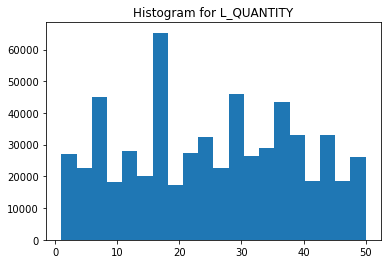

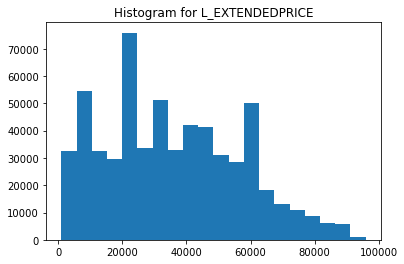

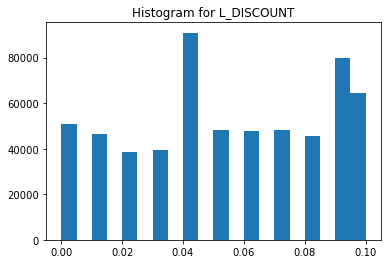

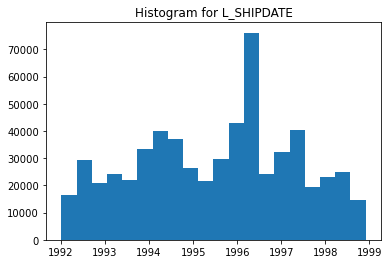

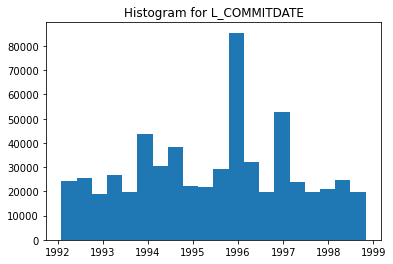

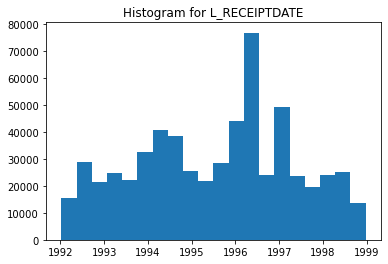

In [28]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

# Create a random number generator with a fixed seed for reproducibility
field_List= getFieldList(tablename="LINEITEM")
col_list= tpch_df.columns
n_bins = 20

for col in psdf.columns: 
    dist1 = psdf[col]    
    field_label = field_List[col_list.index(col)]
    fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=False)
    axs.hist(dist1, bins=n_bins)
    axs.set_title(f"Histogram for {field_label}")